In [59]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
data = pd.read_csv('Naya_Bharat_youtube_comments.csv')
data=data.rename(columns={"Comment Text":"Comment_Text"})
data.head()

,Comment Number,Comment_Text
0,1,NO AMBANI WAS HURT IN MAKING THIS VIDEO
1,2,Free speech is a privilege that we simply cann...
2,3,"I am sorry, I am just a student, i cannot supp..."
3,4,Speaking truth to power is not easy...voices l...
4,5,Thank you for speaking out against fascism. Yo...


In [61]:
# df_exploded = data.explode('Blog_content').reset_index(drop=True)
# data=df_exploded

In [62]:
data.shape

(1065, 2)

In [63]:
data = pd.DataFrame(data.Comment_Text)
data.head()

,Comment_Text
0,NO AMBANI WAS HURT IN MAKING THIS VIDEO
1,Free speech is a privilege that we simply cann...
2,"I am sorry, I am just a student, i cannot supp..."
3,Speaking truth to power is not easy...voices l...
4,Thank you for speaking out against fascism. Yo...


In [64]:
#data.iloc[1,0]  # [row index , column index ]

# Data Cleaning or Pre-Processing

## Step 1 :- Lower case

In [67]:
data.Comment_Text = data.Comment_Text.str.lower()

In [68]:
#data.iloc[1,0]

# Removing Stop Words

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print("No.of StopWords :",len(stop))
#stop

No.of StopWords : 198


In [72]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Comment_Text'] = data['Comment_Text'].apply(lambda x: ' '.join([abc   # x = Text
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [75]:
data['Comment_Text'] = data['Comment_Text'].replace(r'http\S+|www\S+','', regex=True)

# Step 2 :- Punctuation

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def remove_punctuation(abc):   # c <-- abc <-- data
    text_nopunt="".join([c
                         for c in abc
                         if c not in string.punctuation])
    return text_nopunt

In [79]:
data.Comment_Text = data['Comment_Text'].apply(lambda x : remove_punctuation(x))  # x = Text

# Remove Number

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [82]:
data['Comment_Text'] = data['Comment_Text'].replace(r'\d+', '', regex=True)

# Common Words

* manually created as per the case study

In [84]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk
words = set(nltk.corpus.words.words()) # corpus & set array

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [85]:
def clean_text_round2(text):
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens
                      if w.lower() in words)  #
    return text

In [86]:
data = pd.DataFrame(data['Comment_Text'].apply(lambda x: clean_text_round2(x)))


# Lemmatization

Its used to convert Word into Root Word

In [88]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v")
            for w in word_tokenizer.tokenize(text)]

In [90]:
data.Comment_Text = data['Comment_Text'].apply(lambda x :' '.join(lemmatize_text(x)))

In [91]:
data['Comment_Text'] = data['Comment_Text'].apply(lambda x: ' '.join([abc   # x = Text
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# Strip extra whitespace

In [93]:
data['Comment_Text'] = (data['Comment_Text'].astype("str").str.rstrip())

### Removing Duplicate Row

In [95]:
data = data.drop_duplicates('Comment_Text')
data

,Comment_Text
0,hurt make video
1,free speech privilege simply cannot afford lose
2,sorry student cannot support financially man s...
3,speak truth power like need hit nerve keep goo...
4,thank speak fascism courage invaluable
...,...
1059,wait one video rely comedy instead bully peopl...
1060,personal one specially comedy even black comedy
1061,sorry understand send money rich yet money sen...
1062,jealous comedy one thing body like people one ...


###  Finished Data Cleaning

# Term Document Matrix
* Its used to find Most important word in a dataset

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.Comment_Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,818,819,820,821,822,823,824,825,826,827
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yogi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm

,index,0,1,2,3,4,5,6,7,8,...,819,820,821,822,823,824,825,826,827,freq
0,aam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,abb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,year,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
1307,yes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1308,yogi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1309,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [100]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA
tdm1.head(10)

,Word,freq
1168,thank,169
672,like,97
842,people,74
219,comedy,67
1201,truth,64
266,courage,64
265,country,63
1142,support,62
1086,speak,62
776,need,62


# Word Cloud

In [102]:
text = " ".join(review for review in data.Comment_Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 35562 words in the combination of all review.


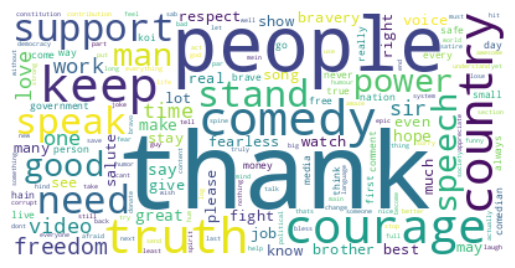

In [171]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

cloud = WordCloud(stopwords=set(STOPWORDS), # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=225).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [105]:
data.head()

,Comment_Text
0,hurt make video
1,free speech privilege simply cannot afford lose
2,sorry student cannot support financially man s...
3,speak truth power like need hit nerve keep goo...
4,thank speak fascism courage invaluable


In [106]:
from textblob import TextBlob

data['polarity'] = data['Comment_Text'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,Comment_Text,polarity
0,hurt make video,0.000
1,free speech privilege simply cannot afford lose,0.200
2,sorry student cannot support financially man s...,0.125
3,speak truth power like need hit nerve keep goo...,0.700
4,thank speak fascism courage invaluable,0.000


In [107]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Comment_Text,polarity,Sentiment
0,hurt make video,0.000,Positive
1,free speech privilege simply cannot afford lose,0.200,Positive
2,sorry student cannot support financially man s...,0.125,Positive
3,speak truth power like need hit nerve keep goo...,0.700,Positive
4,thank speak fascism courage invaluable,0.000,Positive


data.Sentiment.value_counts().plot.bar()

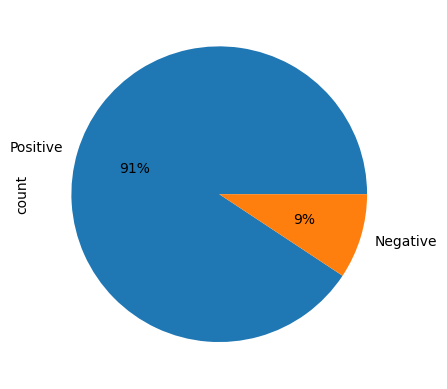

In [109]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");
plt.show()

# Finish

# TF-IDF

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

# settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word')

# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.Comment_Text)
feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc = tfidf_vectorizer_vectors.transpose()

In [113]:
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names).T
output["TF*IDF"]=pd.DataFrame(list(output.max(axis=1)))
output

,aam,abandon,abb,able,absence,absolute,absolutely,abundance,abusive,acceptance,...,wrong,yah,yahan,yarr,year,yes,yogi,young,youth,TF*IDF
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.745779
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.477333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.396731
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.484530
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.610661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.387768
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.528331
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.671811
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.428921


In [114]:
max_indices = []
for index, row in output.iterrows():
  max_index = row.idxmax()
  max_indices.append(max_index)

# Add the result as a new column
output['Word'] = max_indices
output

Final_Output = output.loc[:,["Word","TF*IDF"]]
Final_Output

,Word,TF*IDF
0,hurt,0.745779
1,privilege,0.477333
2,defiance,0.396731
3,nerve,0.484530
4,fascism,0.610661
...,...,...
823,bully,0.387768
824,comedy,0.528331
825,money,0.671811
826,jealous,0.428921
